In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from pathlib import Path

In [2]:
data = Path("../data")

income = pd.read_csv(data / "income_per_person_gdppercapita_ppp_inflation_adjusted.csv", index_col="country")
life_expectancy = pd.read_csv(data / "life_expectancy_years.csv", index_col="country")
population = pd.read_csv(data / "population_total.csv", index_col="country")

In [3]:
income

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
Albania,667,667,667,667,667,668,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
Algeria,715,716,717,718,719,720,721,722,723,724,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
Angola,618,620,623,626,628,631,634,637,640,642,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,682,682,682,682,682,682,682,682,682,683,...,14400,14700,15100,15400,15700,16100,16400,16800,17200,17600
Vietnam,861,861,861,861,861,861,861,861,862,862,...,10100,10300,10600,10800,11000,11300,11500,11800,12100,12300
Yemen,877,879,882,884,887,889,892,894,897,899,...,3250,3320,3390,3470,3540,3620,3700,3790,3870,3960


In [4]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Columns: 219 entries, 1800 to 2018
dtypes: float64(219)
memory usage: 321.4+ KB


In [5]:
life_expectancy.T.columns ^ income.T.columns

Index(['Monaco', 'Nauru', 'Palau', 'San Marino', 'St. Kitts and Nevis',
       'Tuvalu'],
      dtype='object', name='country')

In [6]:
def bubble_plot(year_num):
    year = str(year_num)
    tab = pd.concat([income[year].rename("income"),
                     life_expectancy[year].rename("life_expectancy"),
                     population[year].rename("population")], axis=1, join="outer")

    fig = plt.figure()
    ax = fig.subplots(1, 1)
    ax.scatter(tab["income"], tab["life_expectancy"], s=np.sqrt(tab["population"])/100, alpha=0.3)

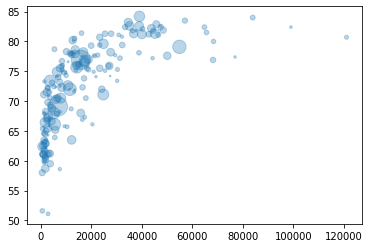

In [7]:
bubble_plot(2018)